<a href="https://colab.research.google.com/github/Dan-Analyst/DATA_ANALYSIS_-PROJECTS/blob/main/TwittersenA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
import pandas as pd

path = '/content/drive/MyDrive/Twitter sent/Twitter_Data.csv'
# Load the dataset,
df = pd.read_csv(path)

# Display the first few rows of the dataframe
print(df.head())



                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0


In [21]:
# Check for missing values and the data type of each column
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB
None


In [30]:
import pandas as pd
import re

# Sample DataFrame loading,
df = pd.read_csv(path)

def preprocess_text(text):
    # Check if text is a string before applying lower()
    if isinstance(text, str):
        # Convert text to lowercase
        text = text.lower()
        # Remove numbers, special characters, and punctuations
        text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
        # Remove extra spaces
        text = text.strip()
    # If text is not a string , return it as is or handle it appropriately
    # Here, we are returning it as is
    return text


# Replace 'Tweets' with 'clean_text' or the correct column name in your DataFrame
df['cleaned_text'] = df['clean_text'].apply(preprocess_text)

# Display the first few rows of the DataFrame to confirm changes
print(df.head())

                                          clean_text  category  \
0  when modi promised “minimum government maximum...      -1.0   
1  talk all the nonsense and continue all the dra...       0.0   
2  what did just say vote for modi  welcome bjp t...       1.0   
3  asking his supporters prefix chowkidar their n...       1.0   
4  answer who among these the most powerful world...       1.0   

                                        cleaned_text  
0  when modi promised minimum government maximum ...  
1  talk all the nonsense and continue all the dra...  
2  what did just say vote for modi  welcome bjp t...  
3  asking his supporters prefix chowkidar their n...  
4  answer who among these the most powerful world...  


In [42]:
# Remove rows where 'clean_text' is NaN
data = df.dropna(subset=['clean_text'])

# Proceed with TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# Fit and transform the cleaned text
features = tfidf_vectorizer.fit_transform(data['clean_text'])

# View the feature dimensions
print(features.shape)


(162976, 1000)


In [35]:
from sklearn.model_selection import train_test_split

# Assuming the actual target variable is named 'category'
X_train, X_test, y_train, y_test = train_test_split(features, data['category'], test_size=0.2, random_state=42)


In [37]:
print(df.columns)


Index(['clean_text', 'category', 'cleaned_text'], dtype='object')


In [39]:
# Remove rows with NaN values in the 'category' column
data = data.dropna(subset=['category'])

# After cleaning, reapply the train-test split
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Re-vectorize the text
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
features = tfidf_vectorizer.fit_transform(data['clean_text'])

# Split the dataset again now that NaN values are removed
X_train, X_test, y_train, y_test = train_test_split(features, data['category'], test_size=0.2, random_state=42)


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
predictions = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))


              precision    recall  f1-score   support

        -1.0       0.80      0.55      0.65      7152
         0.0       0.68      0.93      0.78     11067
         1.0       0.85      0.73      0.78     14375

    accuracy                           0.76     32594
   macro avg       0.77      0.74      0.74     32594
weighted avg       0.78      0.76      0.76     32594

Accuracy: 0.7596183346628214


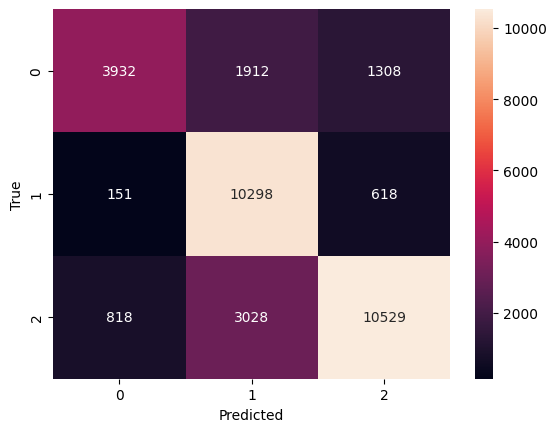

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
